<a href="https://colab.research.google.com/github/Melissagm-23/CIENCIA_DATOS/blob/main/An%C3%A1lisis_EDA_Melissa_G%C3%B3mez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AGENDA


#¿Qué es EDA?
 Es una técnica estadística que se utiliza para explorar y comprender a fondo un conjunto de datos. En lugar de comenzar con hipótesis predefinidas, el EDA busca descubrir patrones, tendencias, anomalías y relaciones ocultas dentro de los datos.

#Análisis inicial de los datos

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Un estudio exhaustivo sobre la obesidad en Colombia y Perú se revela como una necesidad imperante en el panorama actual de salud pública. La creciente prevalencia de esta condición en ambos países exige una comprensión profunda de sus causas y consecuencias. Al analizar los datos, es posible identificar patrones y tendencias que permitan diseñar intervenciones más efectivas. Los factores que contribuyen a la obesidad son múltiples y complejos, incluyendo aspectos genéticos, ambientales y socioeconómicos. La alimentación ultraprocesada, rica en grasas saturadas y azúcares añadidos, combinada con la disminución de la actividad física y el sedentarismo, ha sido señalada como una de las principales causas. Además, factores psicosociales como el estrés y la depresión pueden influir en los hábitos alimentarios y el comportamiento físico, exacerbando el problema. Es fundamental reconocer que la obesidad no es solo un problema estético, sino una enfermedad crónica que aumenta el riesgo de desarrollar diversas complicaciones de salud, como enfermedades cardiovasculares, diabetes tipo 2, hipertensión arterial y ciertos tipos de cáncer. Las consecuencias de la obesidad trascienden el ámbito individual, impactando en los sistemas de salud, la productividad y la calidad de vida de las poblaciones afectadas. Por lo tanto, invertir en investigación y en la implementación de programas de prevención y tratamiento es una inversión en el futuro de la salud pública.

#Información del dataset
Este dataset incluye los niveles de estimacion de obesidad en individuos del país de Mexico, Peru y Colombia, basados en sus habitos alimenticios y condicion fisica

#Inspección de datos y limpieza
El archivo contiene 17 variables y 2111 observaciones. Las variables son:

- Gender: Género de la persona (object).

- Age: Edad de la persona (float64).

- Height: Altura en metros (float64).

- Weight: Peso en kilogramos (float64).

- family_history_with_overweight: Indica si hay historia familiar de sobrepeso (object: "yes" o "no").

- FAVC: Indica si la persona consume alimentos con alto contenido calórico con frecuencia (object: "yes" o "no").

- FCVC: Frecuencia de consumo de vegetales (float64).

- NCP: Número de comidas principales por día (float64).

- CAEC: Frecuencia de consumo de alimentos entre comidas (object: valores como "Sometimes").

- SMOKE: Indica si la persona fuma (object: "yes" o "no").

- CH2O: Consumo de agua diario en litros (float64).

- SCC: Indica si la persona monitorea su ingesta de calorías (object: "yes" o "no").

- FAF: Frecuencia de actividad física en horas por semana (float64).

- TUE: Tiempo usando dispositivos electrónicos en horas por día (float64).

- CALC: Frecuencia de consumo de alcohol (object: valores como "no" o "Sometimes").

- MTRANS: Modo de transporte principal (object: valores como "Public_Transportation", "Walking").

- NObeyesdad: Nivel de obesidad según una clasificación (object: valores como "Normal_Weight", "Overweight_Level_I").

#Importar librerías

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Import LabelEncoder from the correct module
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Add this line if you are using warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
data.sample

<bound method NDFrame.sample of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]>

In [5]:
data.info

<bound method DataFrame.info of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]>

In [6]:
# Calcular los valores medios, máximos y mínimos
# Only include numeric columns for calculations
numeric_data = data.select_dtypes(include=['number'])
media = numeric_data.mean()
maximos = numeric_data.max()
minimos = numeric_data.min()

# Mostrar los resultados
print("Valores medios:\n", media)
print("\nValores máximos:\n", maximos)
print("\nValores mínimos:\n", minimos)

Valores medios:
 Age       24.312600
Height     1.701677
Weight    86.586058
FCVC       2.419043
NCP        2.685628
CH2O       2.008011
FAF        1.010298
TUE        0.657866
dtype: float64

Valores máximos:
 Age        61.00
Height      1.98
Weight    173.00
FCVC        3.00
NCP         4.00
CH2O        3.00
FAF         3.00
TUE         2.00
dtype: float64

Valores mínimos:
 Age       14.00
Height     1.45
Weight    39.00
FCVC       1.00
NCP        1.00
CH2O       1.00
FAF        0.00
TUE        0.00
dtype: float64


In [7]:
#3.4 Valores perdidos
valores_perdidos=data.isnull().sum()
print("valores_perdidos")
print(valores_perdidos)

valores_perdidos
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [8]:
#3.6 Valores duplicados
duplicate_rows=data.duplicated().sum()
print("registros duplicados")
print(duplicate_rows)

registros duplicados
24


In [9]:
#Eliminar los registros duplicados
data=data.drop_duplicates()
display(data)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
#3.7 Identificacion de nan
#Revisando si existen valores nan
print(data.isna())

      Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
...      ...    ...     ...     ...                             ...    ...   
2106   False  False   False   False                           False  False   
2107   False  False   False   False                           False  False   
2108   False  False   False   False                           False  False   
2109   False  False   False   False                           False  False   
2110   False  False   False   False                           False  False   

       FCVC    NCP   CAEC  SMOKE   CH2O    SCC    FAF    TUE   

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

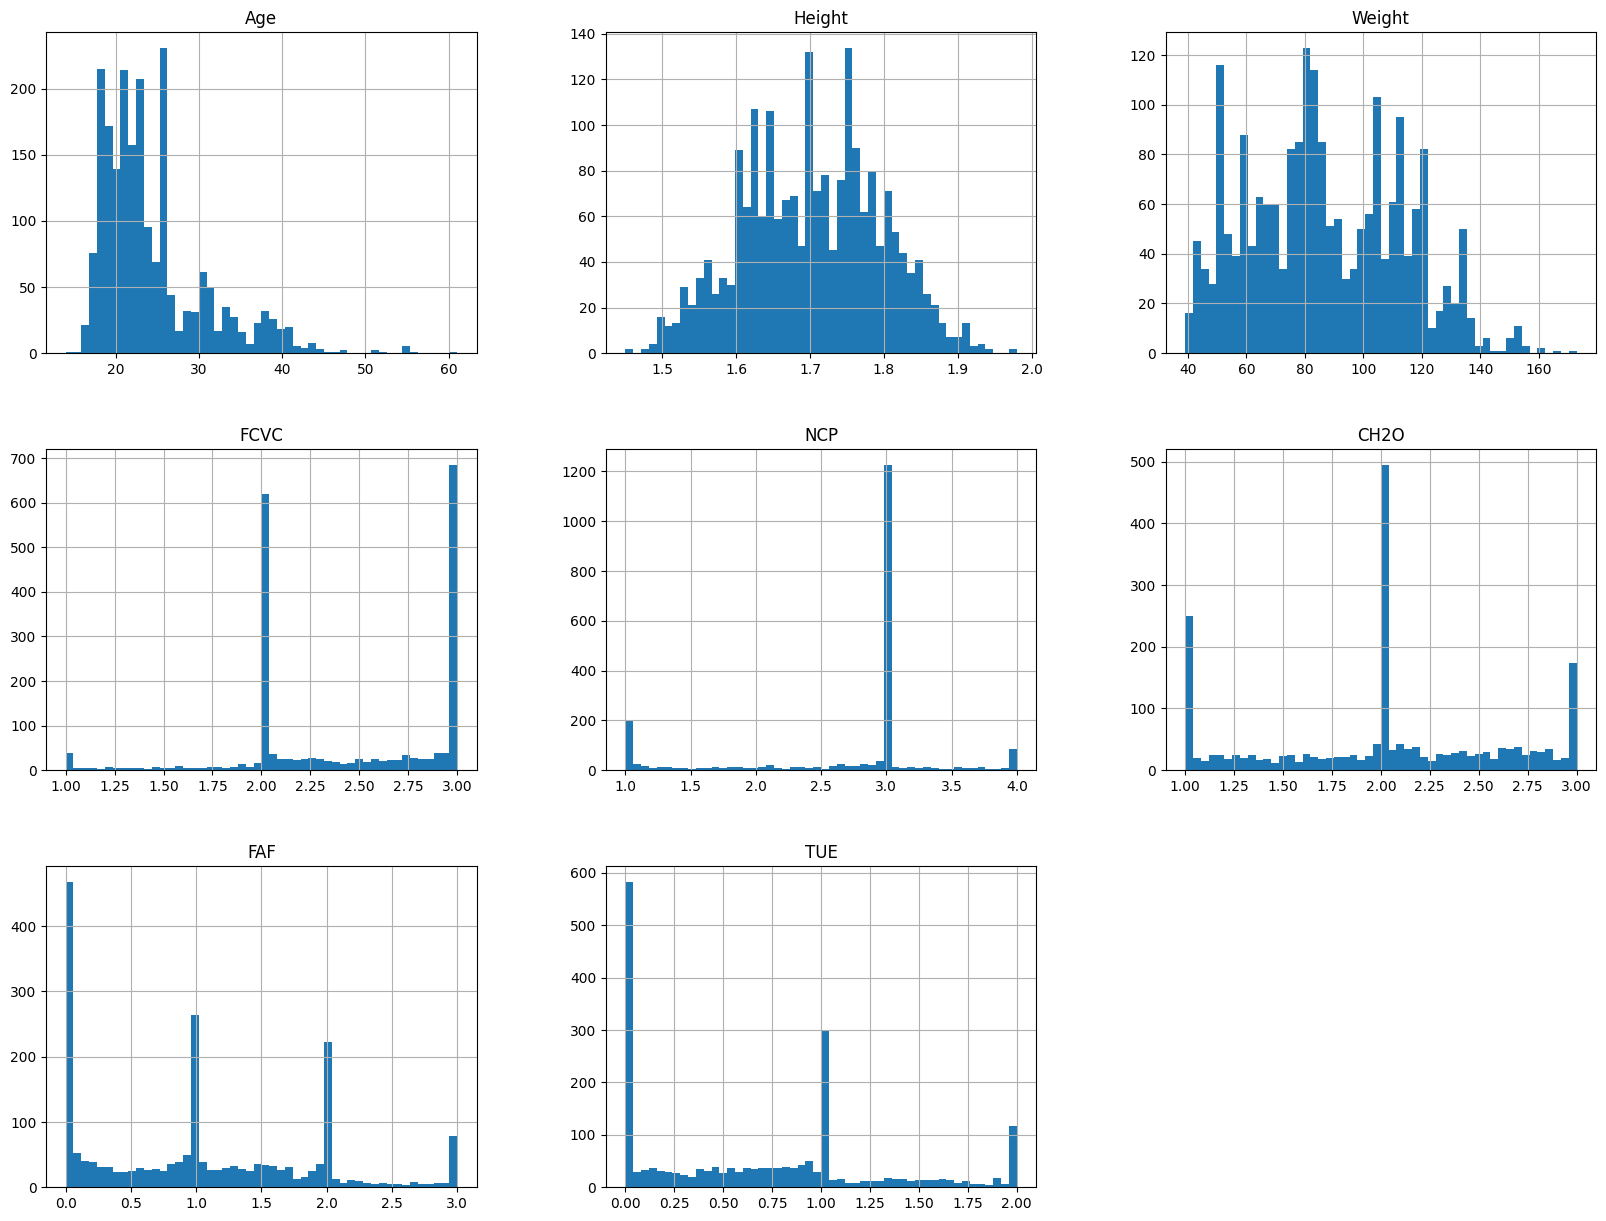

In [11]:
#3.9 Analisis grafico EDA
#dibujando histogramas para diferentes parametros
data.hist(bins=50,figsize=(20,15))

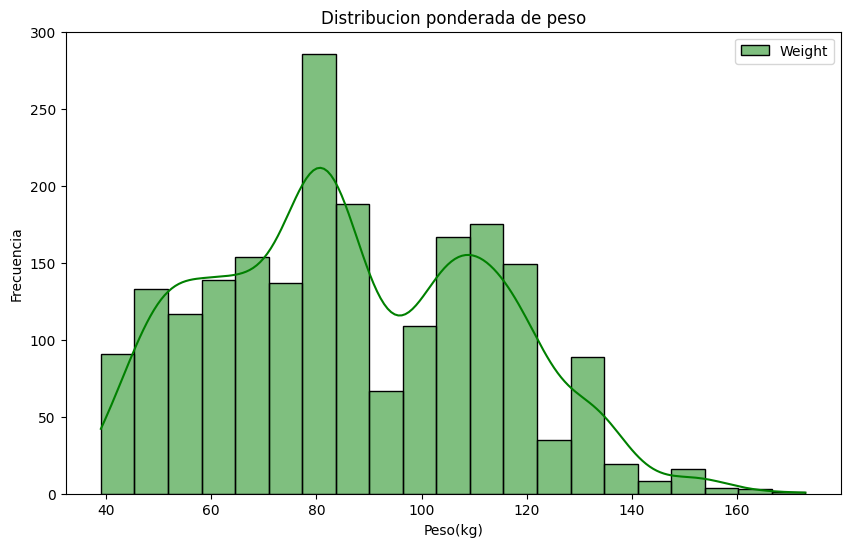

In [12]:
#Dibujar distribucion ponderada
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Weight",color="green",kde=True,label="Weight")
plt.title("Distribucion ponderada de peso")
plt.xlabel("Peso(kg)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

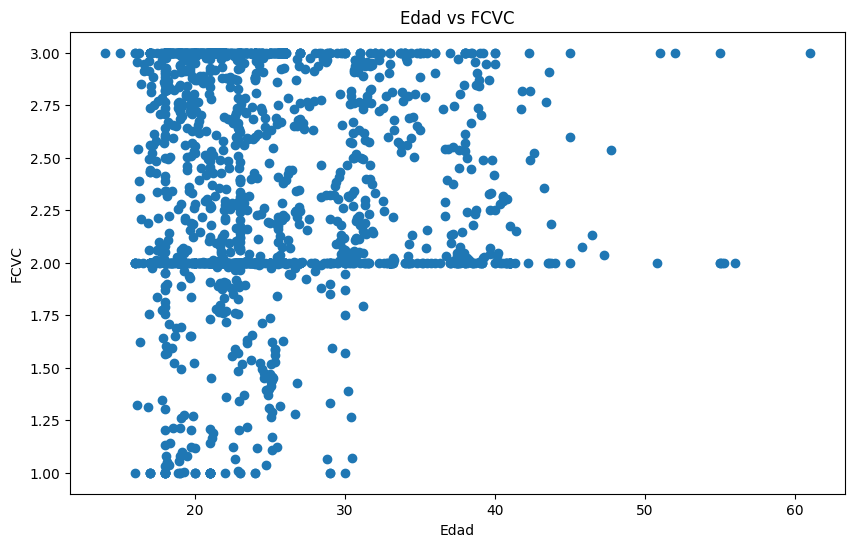

In [13]:
#Analisis de dispercion
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["FCVC"])
plt.title("Edad vs FCVC")
ax.set_xlabel("Edad")
ax.set_ylabel("FCVC")
plt.show()

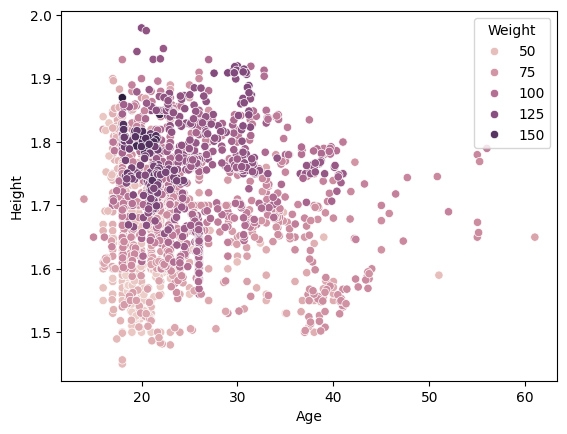

In [14]:
#Diagrama de dispercion entre edad vs estatura para diferentes pesos
scatter_P=sns.scatterplot(x="Age",y="Height",hue="Weight",data=data)

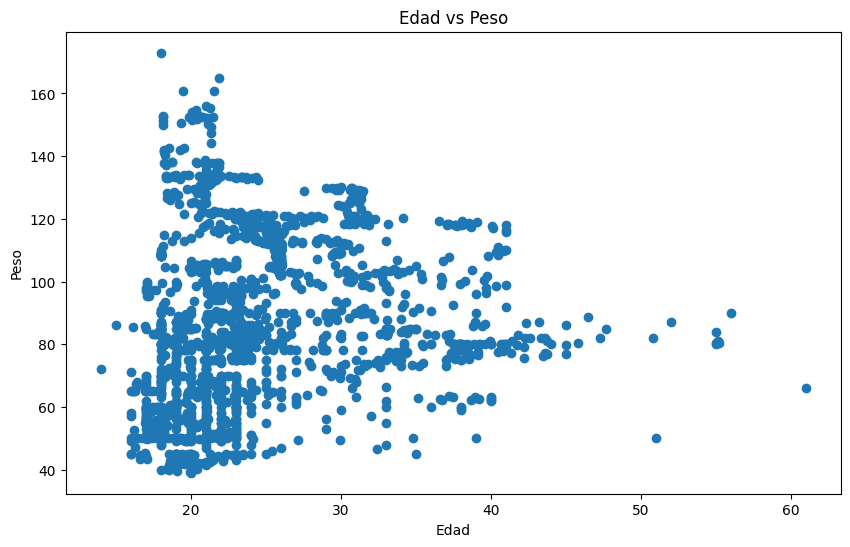

In [15]:
#Graficando scatter plot para evaluar edad vs peso
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["Weight"])
plt.title("Edad vs Peso")
ax.set_xlabel("Edad")
ax.set_ylabel("Peso")
plt.show()

In [16]:
#Análisis entre Edad vs Promedio de peso para el top 15 de edades
top_15_ages=data.groupby("Age")["Weight"]. mean().nlargest(15)
top_15_ages

,Weight
Age,
21.900120,165.057269
19.472190,160.935351
21.521294,160.639405
20.989016,155.872093
21.291969,155.242672
20.327723,154.618446
20.102241,153.959945
20.438478,153.149491
18.112503,152.720545


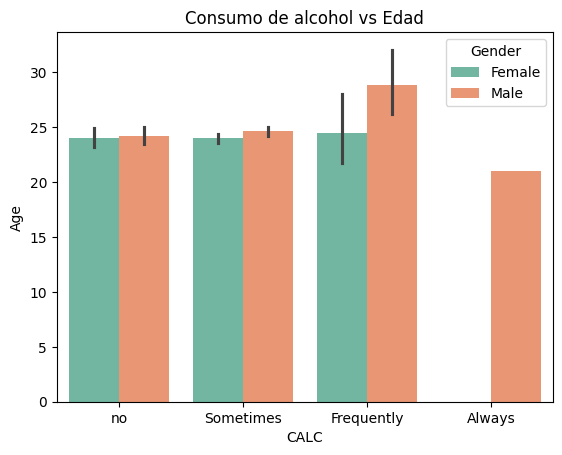

In [17]:
sns.barplot(x="CALC",y="Age",data=data,hue="Gender",palette="Set2")
plt.title("Consumo de alcohol vs Edad")
plt.show()

In [18]:
data["CALC"]=data["CALC"].astype("category")
data["CALC"]

,CALC
0,no
1,Sometimes
2,Frequently
3,Frequently
4,Sometimes
...,...
2106,Sometimes
2107,Sometimes
2108,Sometimes
2109,Sometimes


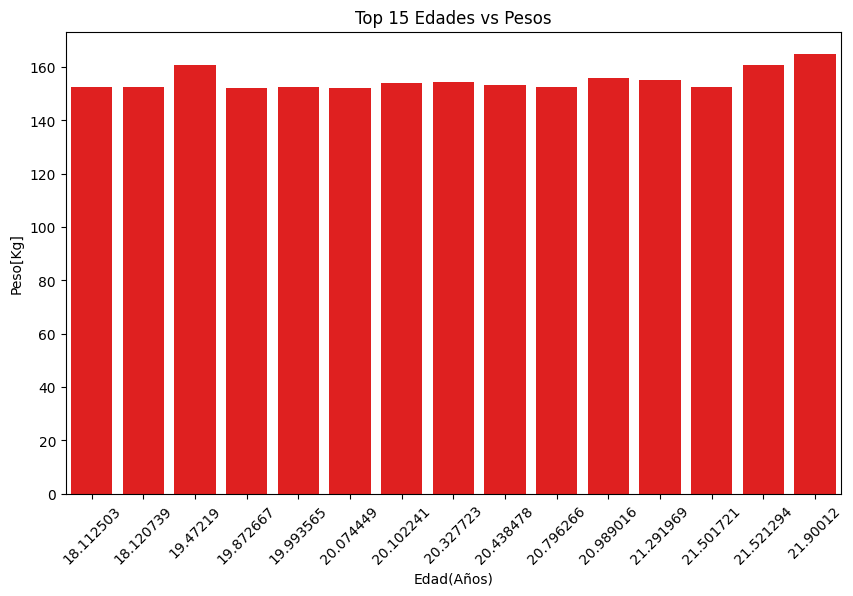

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_15_ages.index, y=top_15_ages.values, color="red")
plt.title("Top 15 Edades vs Pesos")
plt.xlabel("Edad(Años)")
plt.ylabel("Peso[Kg]")
plt.xticks(rotation=45)
plt.show()

In [20]:
data["Age"]=data.Age.round(2)

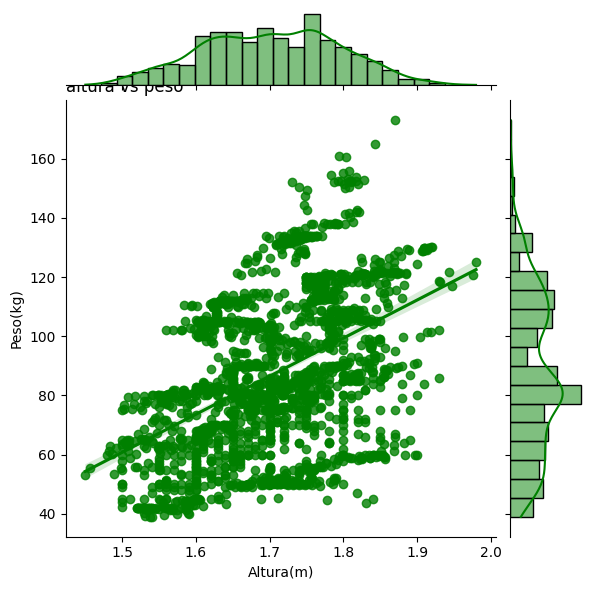

In [21]:
sns.jointplot	(x="Height",y="Weight",data=data,kind="reg",color="green")
plt.title("altura vs peso", loc="left")
plt.xlabel("Altura(m)")
plt.ylabel("Peso(kg)")
plt.show()

In [22]:
#Análisis entre Edad vs Promedio de peso para el top 15 de edades
top_15_ages=data.groupby("Age")["Weight"]. mean().nlargest(15)
top_15_ages

,Weight
Age,
19.47,160.935351
21.52,160.639405
20.33,154.618446
20.44,153.149491
21.06,152.094362
20.38,151.975864
20.09,151.417292
19.36,150.516480
21.32,149.291106


In [23]:
data["Age"]=data.Age.round(2)

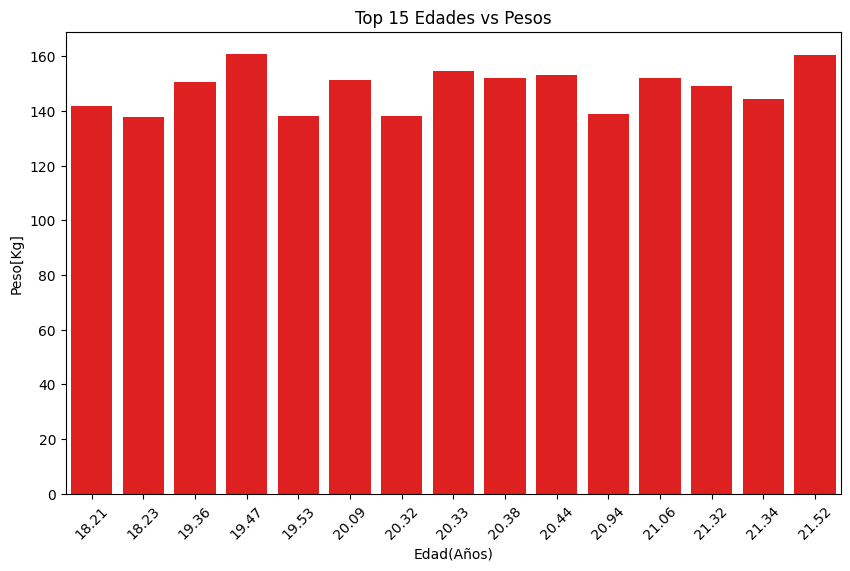

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_15_ages.index, y=top_15_ages.values, color="red")
plt.title("Top 15 Edades vs Pesos")
plt.xlabel("Edad(Años)")
plt.ylabel("Peso[Kg]")
plt.xticks(rotation=45)
plt.show()

In [25]:
data["CALC"]=data["CALC"].astype("category")
data["CALC"]

,CALC
0,no
1,Sometimes
2,Frequently
3,Frequently
4,Sometimes
...,...
2106,Sometimes
2107,Sometimes
2108,Sometimes
2109,Sometimes


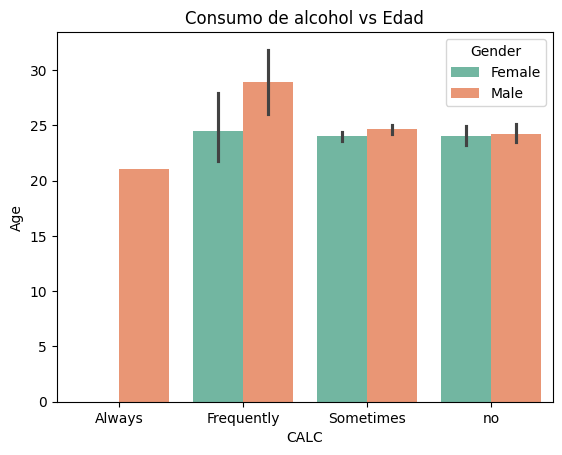

In [26]:
sns.barplot(x="CALC",y="Age",data=data,hue="Gender",palette="Set2")
plt.title("Consumo de alcohol vs Edad")
plt.show()

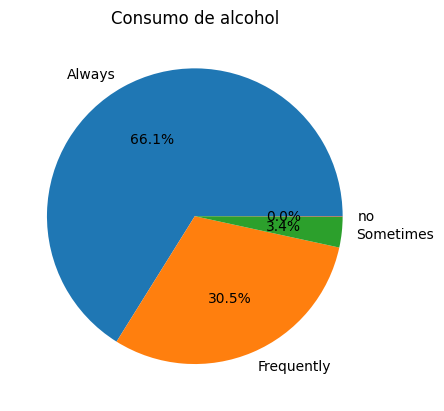

In [27]:
#Diagrama de torta para mostrar el % de consumo de alcohol
count= data["CALC"].value_counts()
labels=["Always","Frequently","Sometimes","no"]
plt.pie(count,labels=labels,autopct="%1.1f%%")
plt.title("Consumo de alcohol")
plt.show()

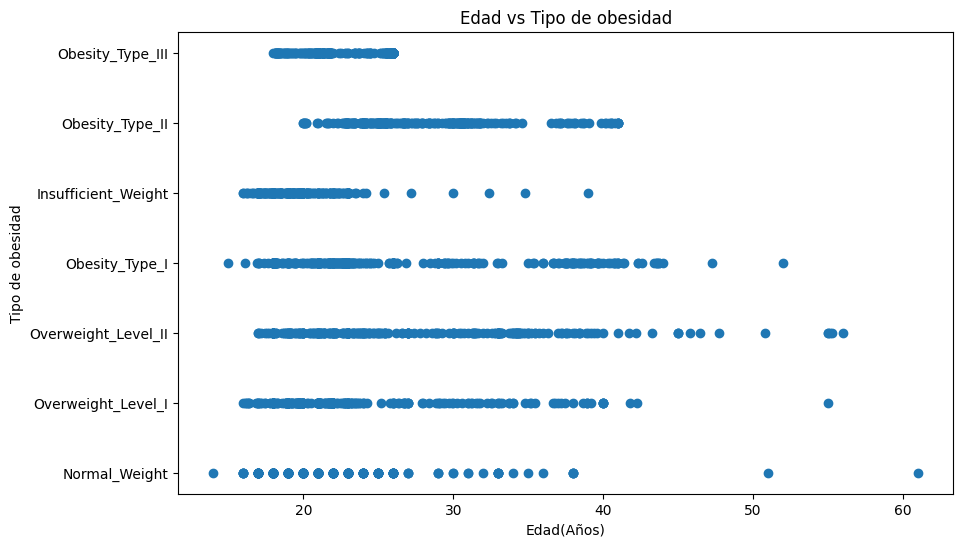

In [28]:
#Graficando edad vs tipo de obesidad usando diagrama de dispersion
#Age vs NOBeyesdad
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["NObeyesdad"])
plt.title("Edad vs Tipo de obesidad")
ax.set_xlabel("Edad(Años)")
ax.set_ylabel("Tipo de obesidad")
plt.show()